# **Importing Libraries**

In [35]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from io import StringIO
import missingno as msno
pd.set_option("display.max_columns",None) 

# **Reading Dataset**

#### Cleaning the dataset column names 

In [36]:
with open("TeleCom_Data-1.csv", "r", encoding="utf-8") as f:
    cleaned_lines = []
    for line in f:
        line = line.strip()               
        if line.startswith('"') and line.endswith('"'):
            line = line[1:-1]                 
        line = line.replace('""', '"')          
        cleaned_lines.append(line)

data = StringIO("\n".join(cleaned_lines))

#### Loading the cleaned dataset into df dataframe

In [37]:
df = pd.read_csv(data, sep=";", quotechar='"', engine="python")
df_original = df.copy()

# **Descriptive Statistics**

In [38]:
# Getting the first 5 rows
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
# Getting the last 5 rows
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41175,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41176,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41177,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41178,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41179,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [40]:
# Getting the shape of the datset
df.shape

(41180, 21)

In [41]:
# Getting the information about variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [42]:
# Getting the statstical description of our numerical variables
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41180.00,41180.00,41180.00,41180.00,41180.00,41180.00,41180.00,41180.00,41180.00,41180.00
mean,40.02,258.28,2.57,962.52,0.17,0.08,93.58,-40.50,3.62,5167.05
std,10.42,259.30,2.77,186.81,0.49,1.57,0.58,4.63,1.73,72.23
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [43]:
# Getting the description or our categorical varialbles
df.describe(include="object")


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24921,12166,32581,21571,33943,26140,13765,8622,35559,36542


# **Missing Values Analysis**

In [44]:
# Checking for missing values

missing_counts = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)
missing_summary = pd.DataFrame({'Count': missing_counts, 'Percent': missing_percent})
print(missing_summary[missing_summary['Count'] > 0], "\n")
    

Empty DataFrame
Columns: [Count, Percent]
Index: [] 



<Axes: >

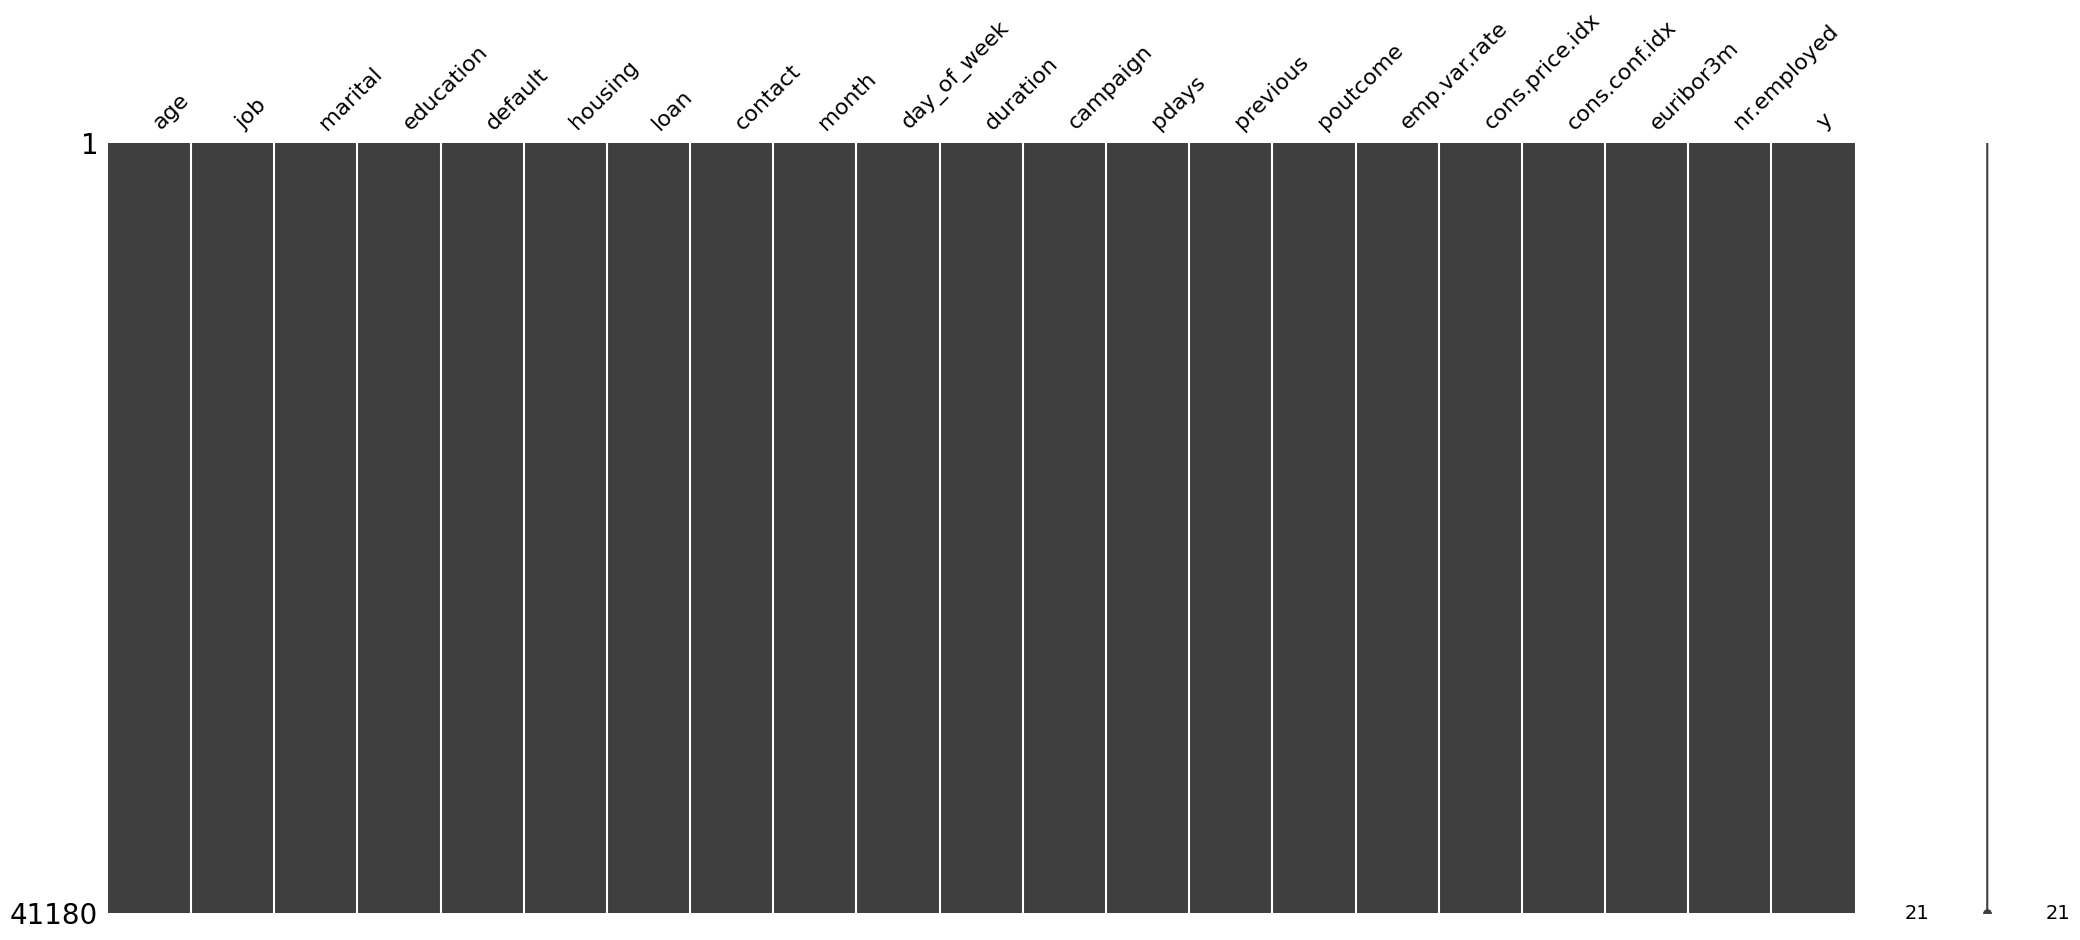

In [45]:
# Visualizing missing values
msno.matrix(df)

#### The dataset if free from missing values

# **Data error detection**

In [46]:
# Checking if "age" has invalid entries
if 'age' in df.columns:
    
    invalid_age = df[(df['age'] < 0) | (df['age'] > 120)]
    print("Logical Inconsistencies (Age)")
    print(f"Invalid age entries: {len(invalid_age)}\n")
    

Logical Inconsistencies (Age)
Invalid age entries: 0



In [47]:
# Checking for duplicates
total_dupes = df.duplicated().sum()
print(f"Exact duplicates: {total_dupes}")
percentage_dup = (total_dupes/ len(df) * 100).round(2)
print(f'Duplicate Percentage: {percentage_dup}')
print(f'Dataset shape: {df.shape}')    

Exact duplicates: 12
Duplicate Percentage: 0.03
Dataset shape: (41180, 21)


### Since the duplicate size is small so we can drop them

In [48]:
# Dropping duplicates
df = df.drop_duplicates()
print(f'Dataset shape after dropping duplicates: {df.shape}') 

Dataset shape after dropping duplicates: (41168, 21)


# Distributions, Univariate, and Bivariate Plots

C:\Users\HP\AppData\Local\Temp\ipykernel_20940\1890696031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='y', data=target_df,


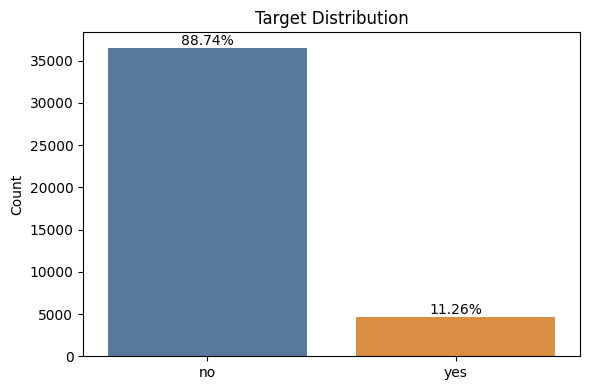

In [49]:
# Exploring the response variable
target_df = df[['y']]  

plt.figure(figsize=(6,4))
ax = sns.countplot(x='y', data=target_df, 
                   palette=['#4E79A7', '#F28E2B'])

plt.title('Target Distribution')
plt.xlabel('')
plt.ylabel('Count')

# Add percentage labels
total = len(target_df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


#### The bar chart shows that our target variable is imbalanced, with around 89% of people not subscribing to the subscription plan.

#### Dividing columns into `categorical_cols` and `numerical_cols` for analysing. 

In [50]:
categorical_cols = []
numerical_cols = []


for col in df.columns:
    if df[col].dtypes == 'object':
        if col != 'y':
            categorical_cols.append(col)


for col in df.columns:
    if col not in  categorical_cols:
        if col != 'y':
            numerical_cols.append(col)


# Analysing `categorical_cols` 

C:\Users\HP\AppData\Local\Temp\ipykernel_20940\1347145869.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_20940\1347145869.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_20940\1347145869.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_20940\1347145869.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` an

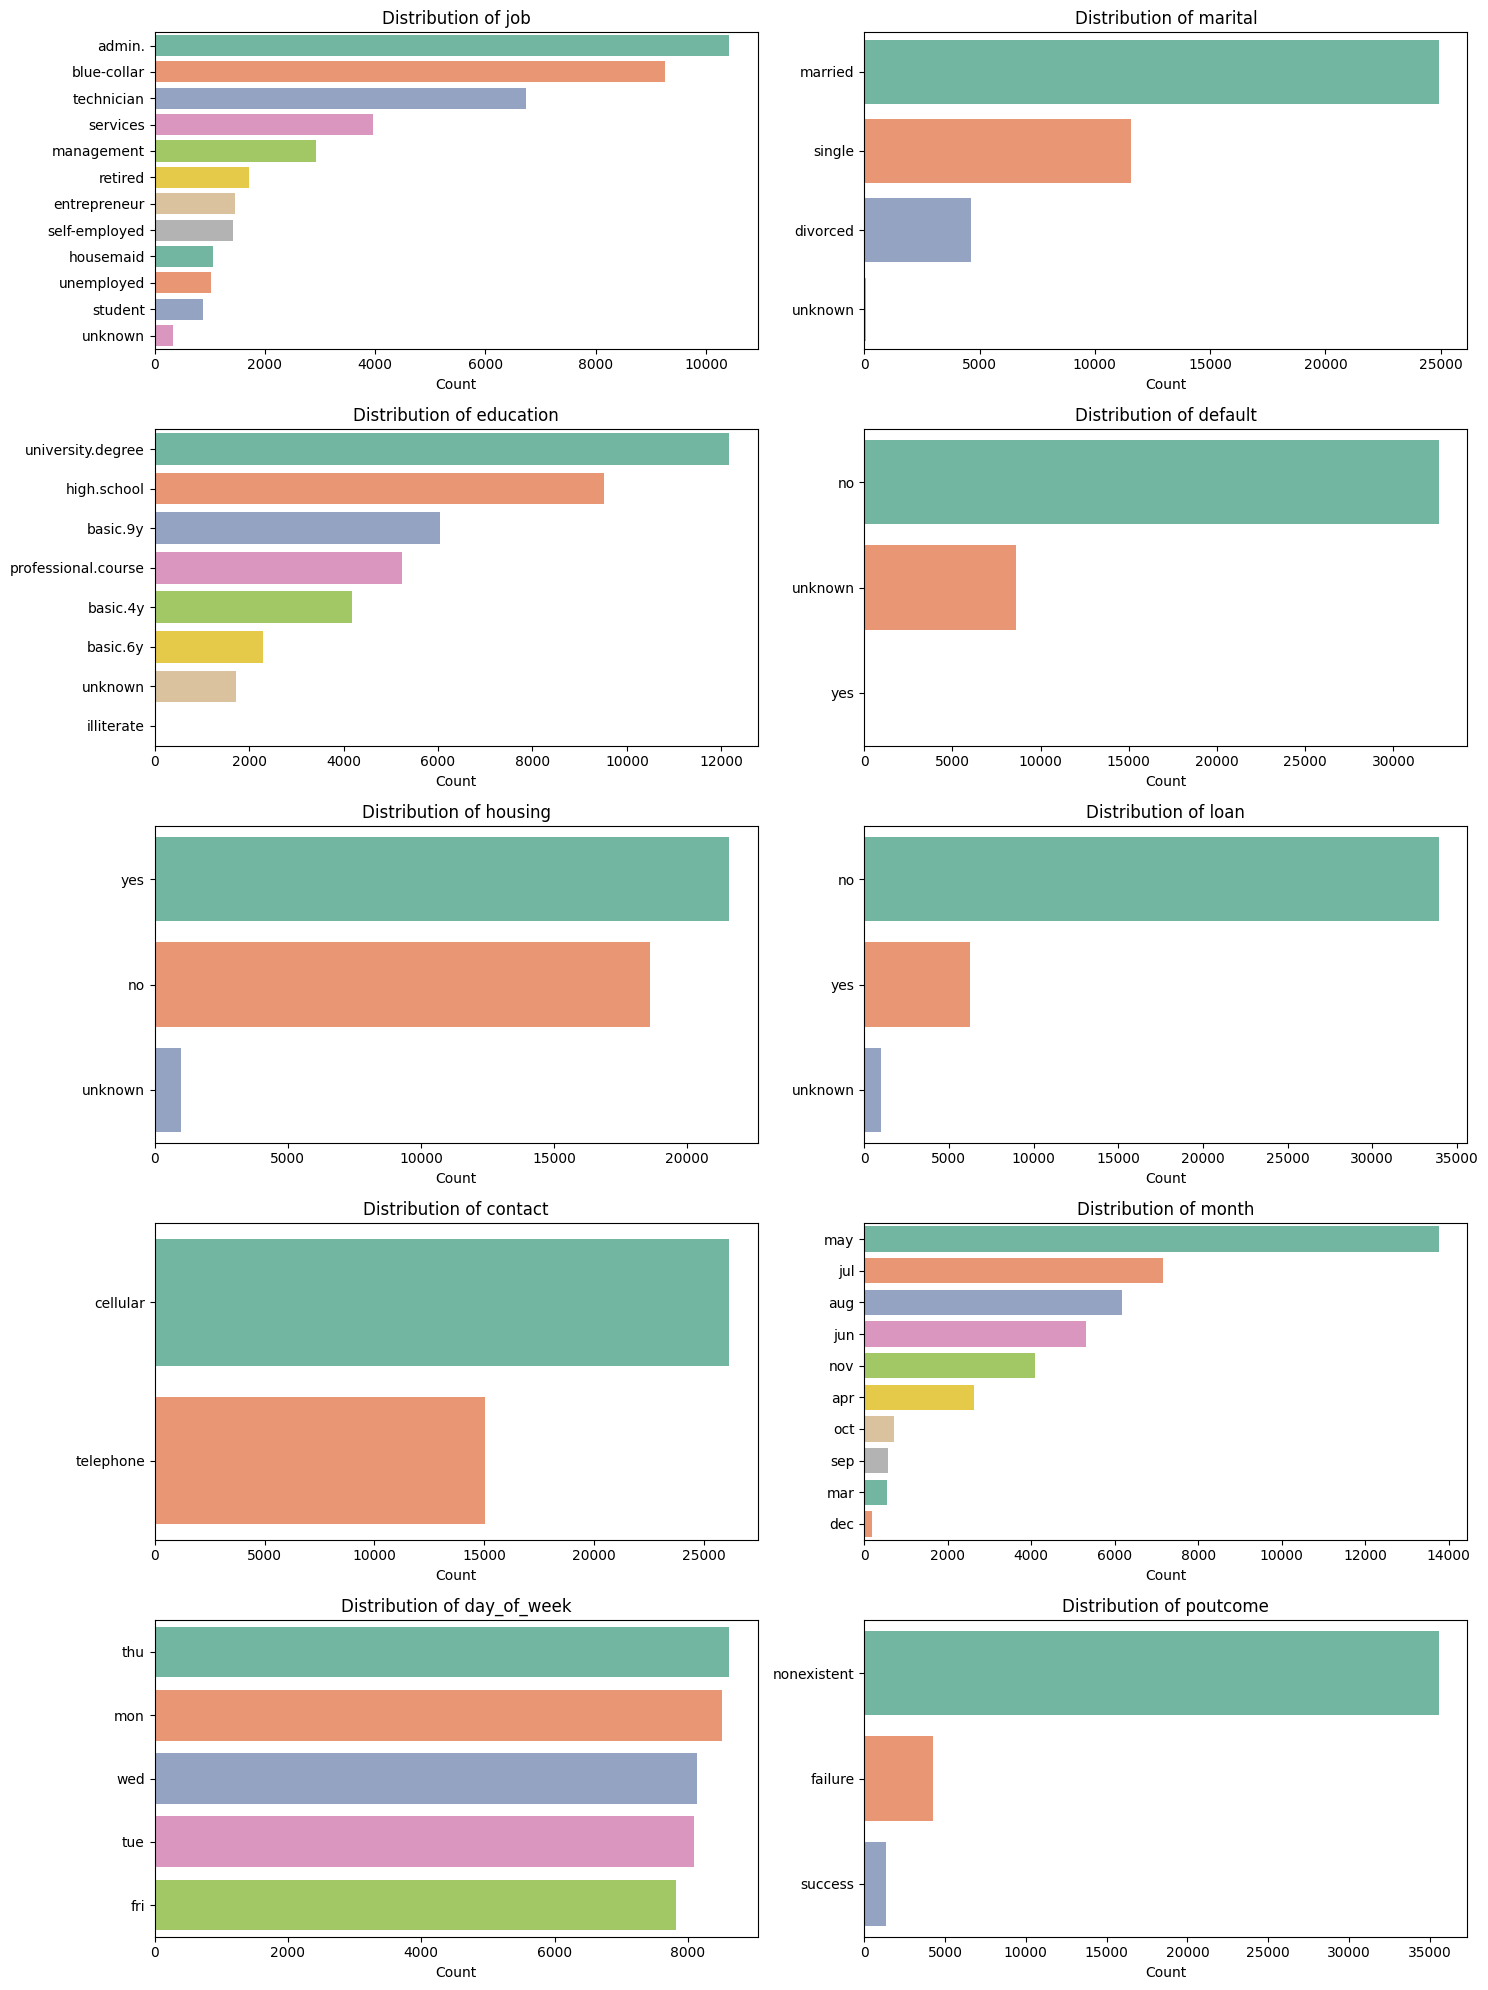

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Copy dataset for plotting
plot_df = df.copy()
max_categories = 12  # Limit to top N categories
n_cols = 2           # Number of subplot columns
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    data = plot_df.copy()
    
    # Limit to top categories
    top_categories = data[col].value_counts().nlargest(max_categories).index
    
    sns.countplot(
        y=col,
        data=data,
        order=top_categories,
        ax=axes[i],
        palette='Set2'
    )
    
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


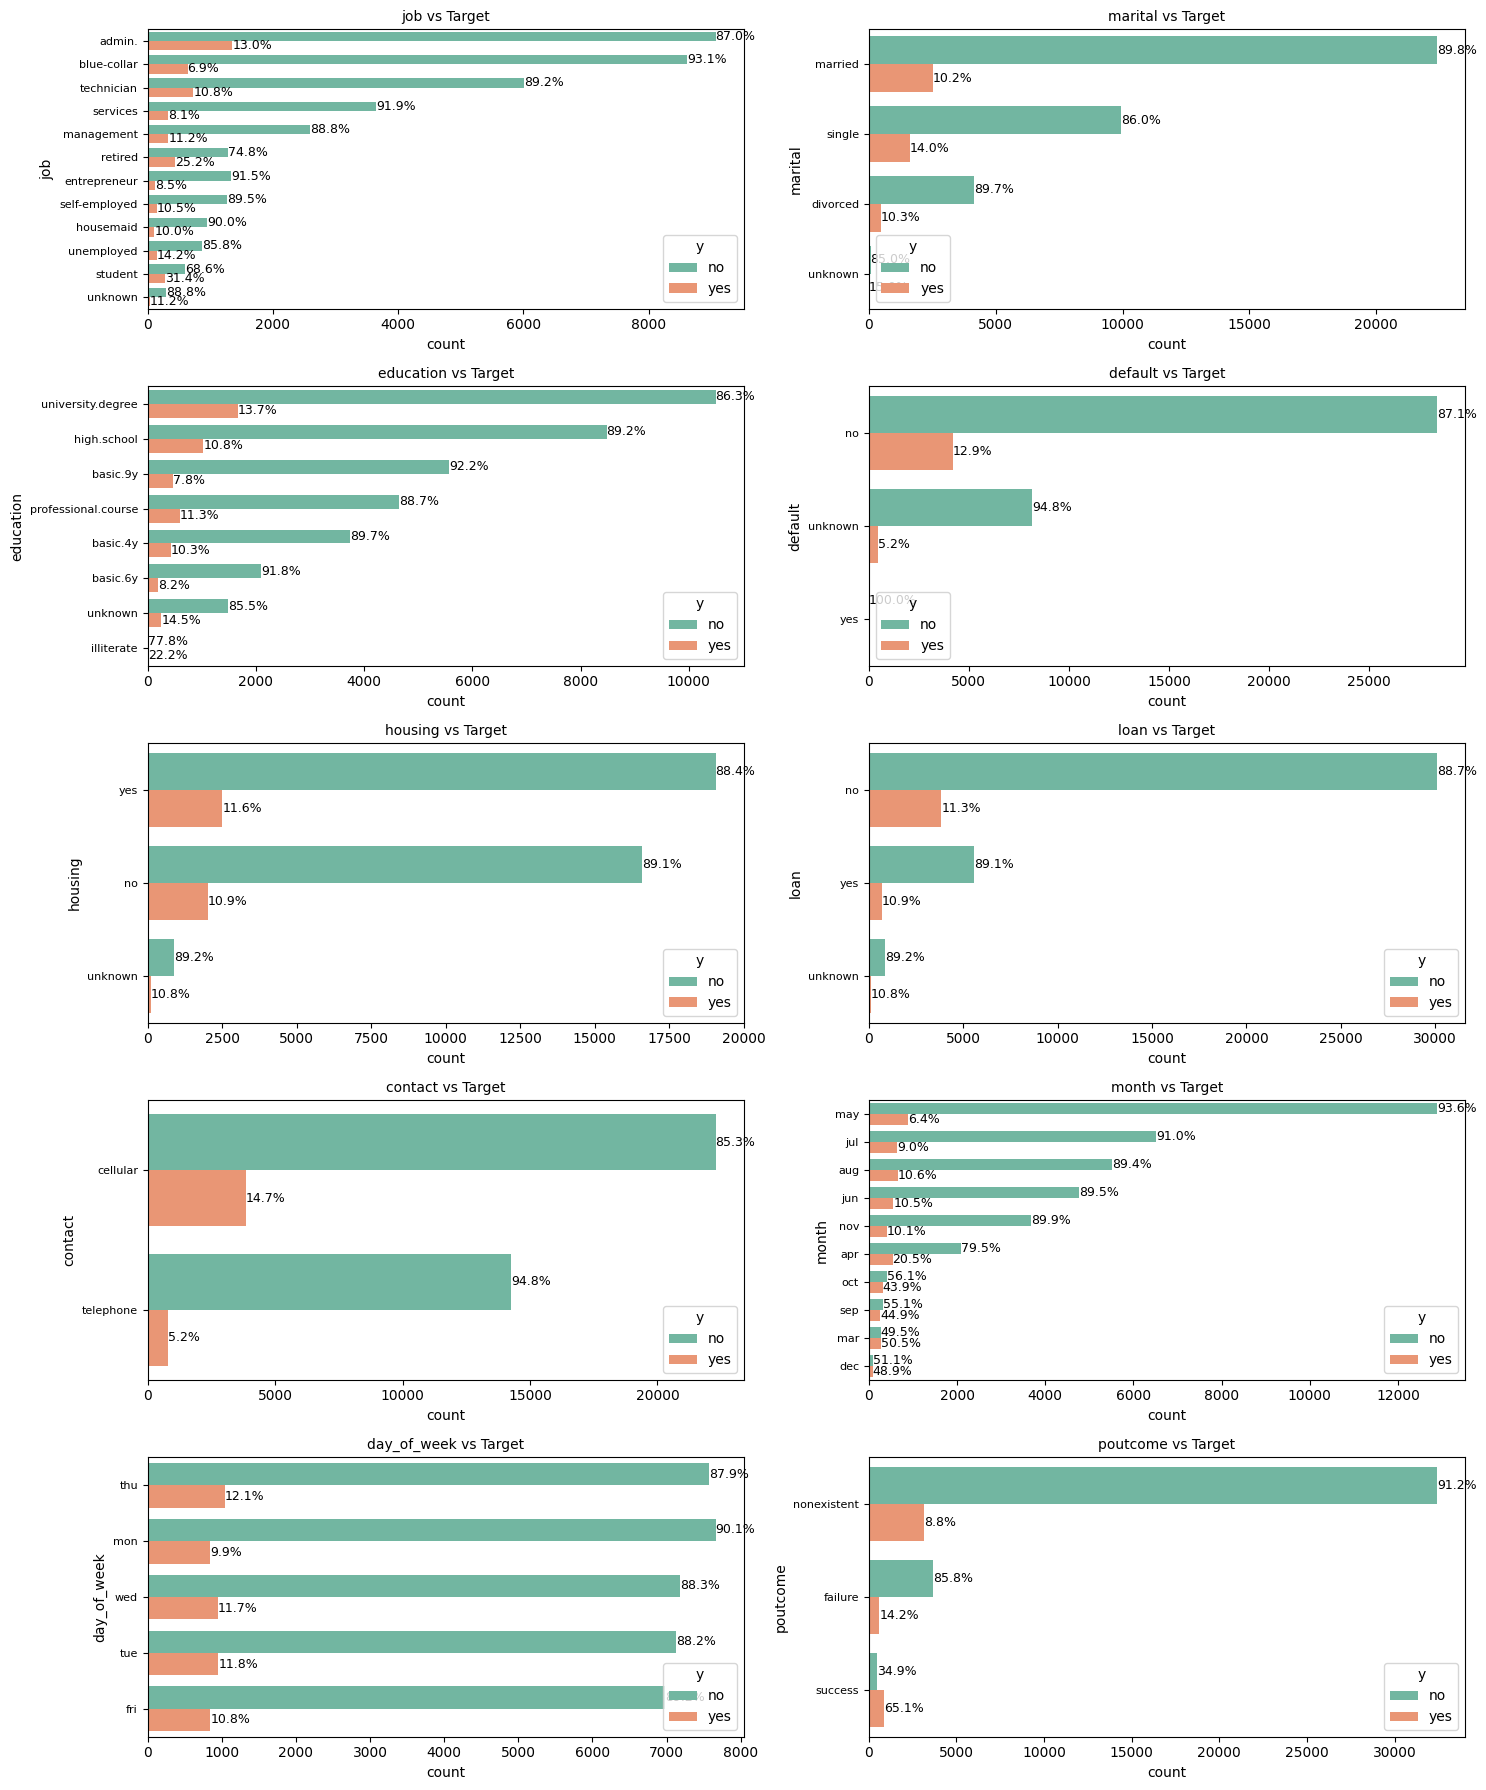

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

train_plot_df = df.copy()
max_categories = 12
n_cols = len(categorical_cols)
n_rows = math.ceil(n_cols / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    data = train_plot_df.copy()
    
    # Limit to top categories
    top_categories = data[col].value_counts().nlargest(max_categories).index
    ax = axes[i]
    
    sns.countplot(
        y=col, hue='y', data=data,
        order=top_categories, ax=ax,
        palette='Set2'
    )
    
    # Add title and adjust ticks
    ax.set_title(f"{col} vs Target", fontsize=10)
    ax.tick_params(axis='y', labelsize=8)
    
    # Calculate totals per category
    totals = data[col].value_counts()
    
    # Add percentages
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            y_value = p.get_y() + p.get_height()/2
            category = p.get_y()  # approximate position; we'll map it
            # Better: use index mapping from top_categories
            category_index = int(p.get_y() + 0.5)
            category_name = top_categories[category_index]
            total = totals[category_name]
            percentage = 100 * width / total
            ax.text(width, y_value, f"{percentage:.1f}%", ha="left", va="center", fontsize=9)

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1) `job` 

    **Students** have the highest success rate at 31.4%, but their sample size is very small. **Retired** people, on the other hand, have the highest success rate of 25.2% among larger groups, which could be due to having more free time and a stable income from pensions. In contrast, **blue-collar** workers have the lowest success rate, possibly because of hectic schedules and limited free time.
2) `marital`

    **Single** individuals show slightly higher responsiveness, possibly due to simpler financial decision-making processes and less responsibilities.
3) `education`

    **Illiterates** show a strong positive response to the campaign, but due to their small sample size, the results are likely unreliable. In contrast, higher education correlates with better campaign response rates, suggesting that more educated clients are more receptive to financial products.
4) `default`

    Non defaulters are more likely to buy the subscription, mostly because they have sufficient funds.
5) `housing`

    Having a house does't have a significant impact on the success rate.
6) `loan`

    Current loan status appears to have minimal impact on campaign success, suggesting the product being marketed appeals equally across existing debt levels.
7) `contact`

    Cellular contact is nearly 3 times more effective than traditional telephone contact.
8) `month`

    Summer months show consistently lower engagement, whereas fall months demonstrate consistently strong performance. However, **March** shows extraordinary performance with a 50% success rate.
9) `day_of_week`

    Timing during the week has minimal impact, suggesting consistent outreach scheduling is sufficient.
10) `poutcome`

    Clients who previously responded positively to campaigns are more likely to respond positively again, making this the most powerful predictor.

### Looking for Categorical Variables with Category Frequency Less than 1%

In [53]:
rare_cat_dict = {}

for col in df.select_dtypes(include=['category', 'object']):
    freq = df[col].astype("category").value_counts(normalize=True, dropna=True)
    rare_cats = freq[freq < 0.01].index.tolist()  # or <= 0.01 if you prefer
    if rare_cats:
        rare_cat_dict[col] = rare_cats

if rare_cat_dict:
    for col, cats in rare_cat_dict.items():
        print(f"{col}: {cats}")
else:
    print("No categorical values occur in less than 1% of (non-missing) rows.")

job: ['unknown']
marital: ['unknown']
education: ['illiterate']
default: ['yes']
month: ['dec']


#### Keeping them as though they are very few in numbers they contribute in the subscription status.

### Looking for Categorical Variables with Unknown Values

In [54]:
# Getting the categorical variables with unknown values
unknown_cols = []

for col in df.columns:
    # Count 'unknown' or 'nonexistent' values
    count_unknown = ((df[col] == 'unknown') | (df[col] == 'nonexistent')).sum()
    
    if count_unknown > 0:
        unknown_cols.append(col)
        print(f"Unknown values in {col}: {count_unknown}")
        print(f"Percentage of unknown values: {((count_unknown / df[col].count()) * 100).round(2)}\n")


Unknown values in job: 330
Percentage of unknown values: 0.8

Unknown values in marital: 80
Percentage of unknown values: 0.19

Unknown values in education: 1730
Percentage of unknown values: 4.2

Unknown values in default: 8595
Percentage of unknown values: 20.88

Unknown values in housing: 990
Percentage of unknown values: 2.4

Unknown values in loan: 990
Percentage of unknown values: 2.4

Unknown values in poutcome: 35547
Percentage of unknown values: 86.35



In [55]:
# Checking for categorical values that have values like "unknown", "nonexistent", "nan" etc
for col in df.select_dtypes(include=['object']):
    print(df[col].unique())

['admin.' 'services' 'blue-collar' 'technician' 'housemaid' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.6y' 'high.school' 'basic.9y' 'professional.course' 'unknown'
 'basic.4y' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


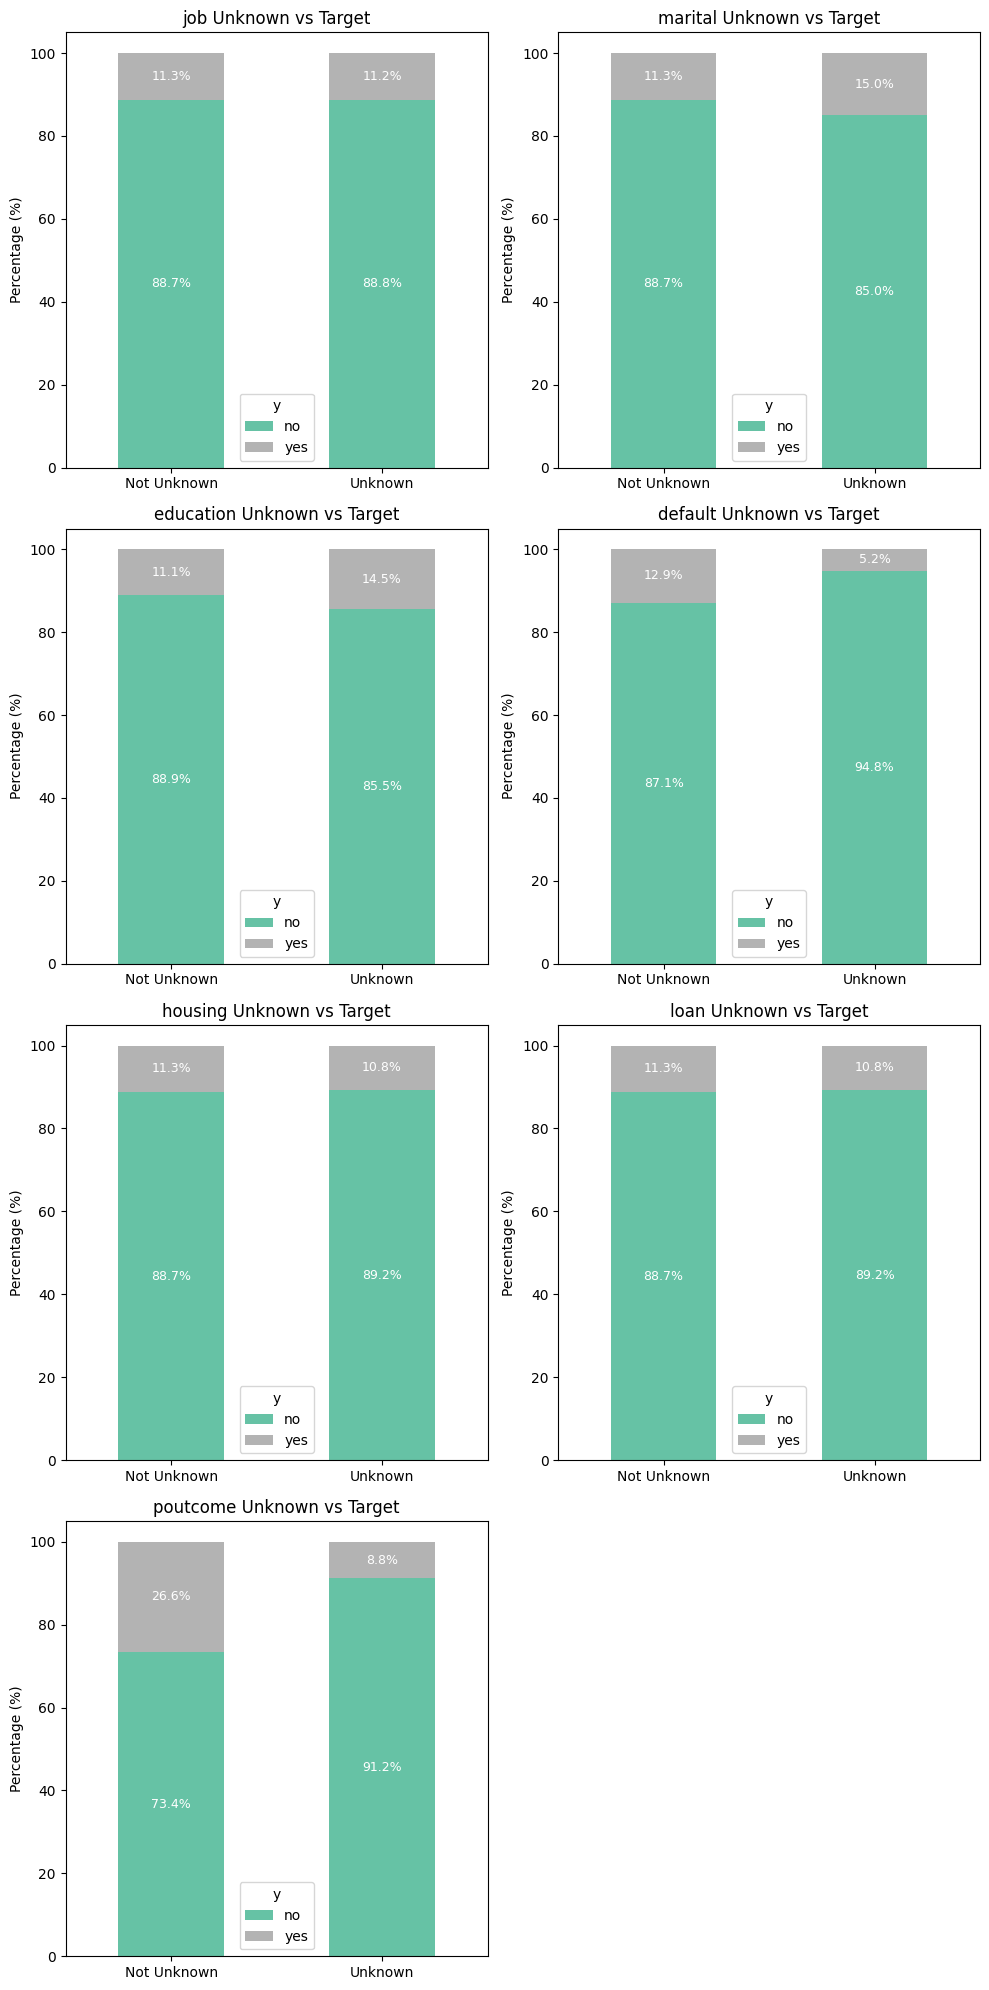

In [56]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

tokens = ["unknown", "nonexistent"]

y_aligned = df['y']

n_cols = 2
n_rows = math.ceil(len(unknown_cols) / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(unknown_cols):
    s = df[col].astype(str).str.strip().str.lower()
    
    # Group Unknown vs Not Unknown (including NaN)
    group = np.where(s.isin(tokens) | df[col].isna(), "Unknown", "Not Unknown")
    
    # Crosstab to get percentages
    ctab = pd.crosstab(group, y_aligned, normalize="index") * 100
    
    ax = axes[idx]
    ctab.plot(kind="bar", stacked=True, colormap="Set2", ax=ax)
    
    ax.set_title(f"{col} Unknown vs Target")
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel("")
    ax.legend(title=y_aligned.name or "Target")
    ax.tick_params(axis='x', rotation=0)
    
    # Add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", color="white", fontsize=9)

# Remove unused axes
for j in range(len(unknown_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#####  keeping the “Unknown” categories to preserve data integrity and capture potential predictive signals embedded in missingness, especially since the stacked barplots show markedly different target distributions within unknown groups.

# Analysing `numerical_cols` with the target variable 

### Replacing 999 with -1 as 999 is commonly used to represent missing values in real-world datasets, and -1 indicates customers who were not contacted previously

In [57]:
df['pdays'] = df['pdays'].replace(999,-1)

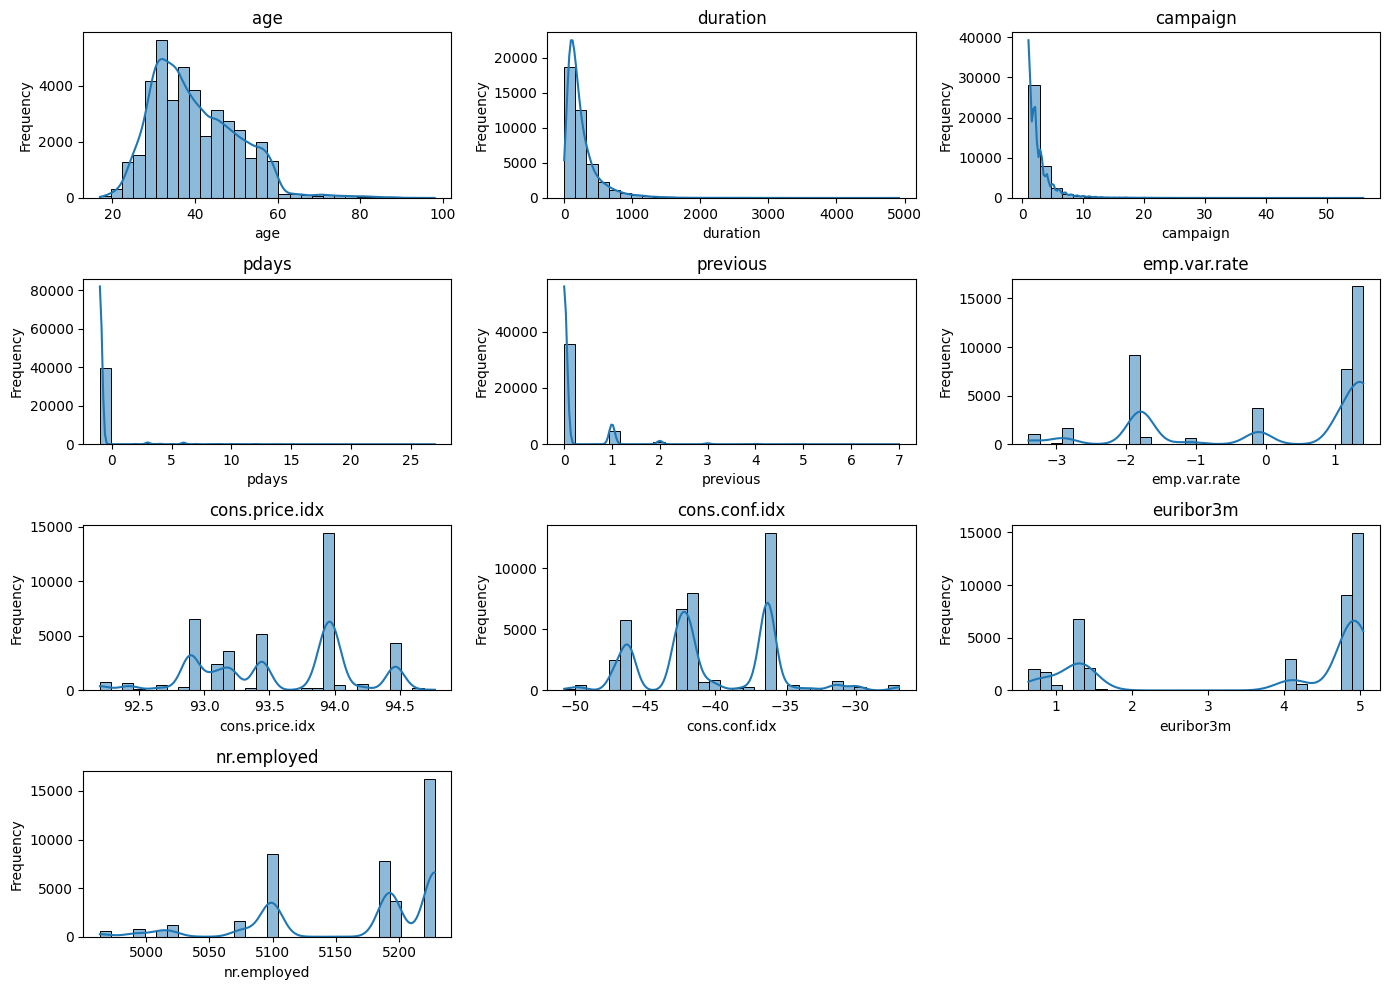

In [58]:
n_vars = len(numerical_cols)
rows = math.ceil(n_vars / 3)   # 3 columns fixed
fig, axes = plt.subplots(rows, 3, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(numerical_cols):
    sns.histplot(df[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### The histograms shows non-normal distributions across the numerical variables.

#### Boxplots of economic indicator features

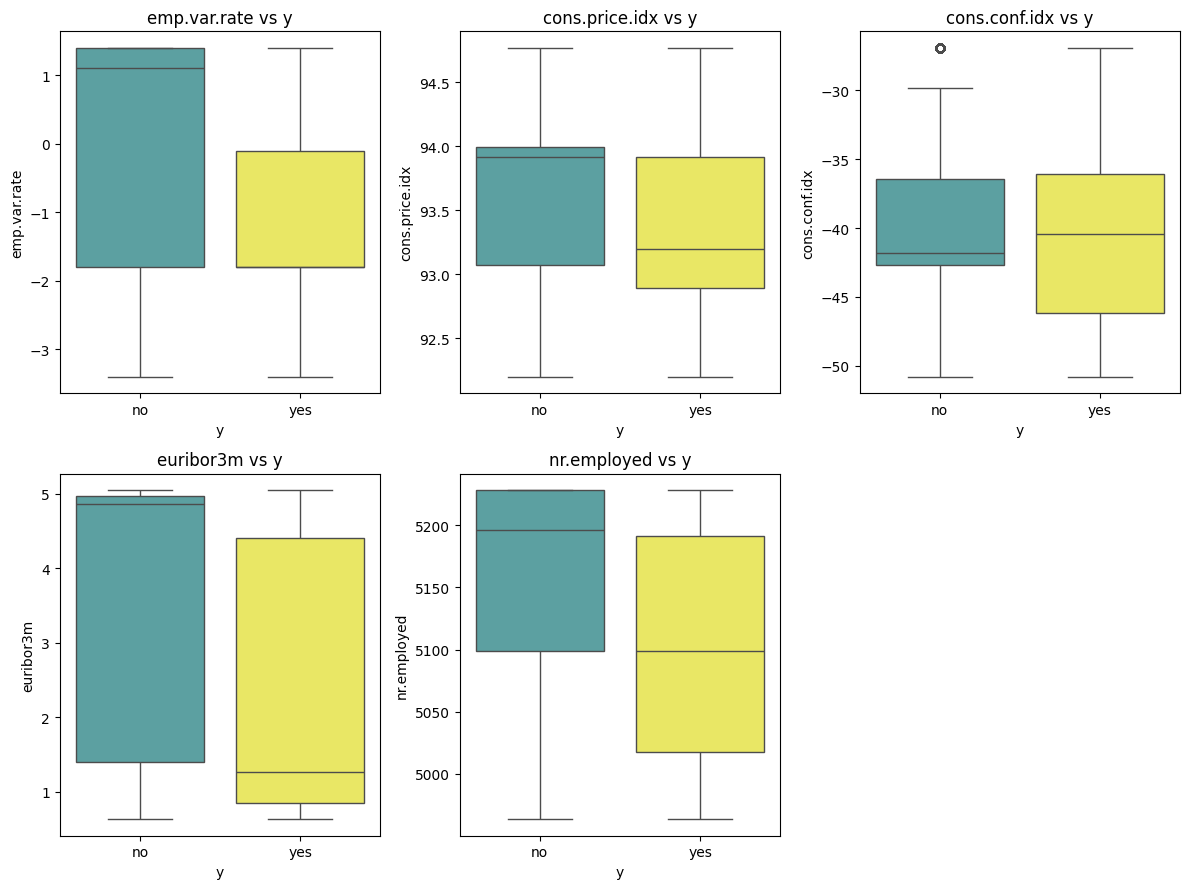

In [59]:
palette_map = {'no': "#51ABAC", 'yes': "#FFFC4F"}
# List of economic indicator columns
econ_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

fig, axes = plt.subplots(2, 3, figsize=(12, 9))
axes = axes.flatten()

for i, col in enumerate(econ_cols):
    sns.boxplot(x='y', y=col, hue='y', data=df,
                ax=axes[i], palette=palette_map, dodge=False, legend=False)
    axes[i].set_title(f'{col} vs y')
    axes[i].set_xlabel('y'); axes[i].set_ylabel(col)

# hide the unused last subplot (since 2x3=6 but we have 5 plots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


#### Boxplots of remaining numerical features

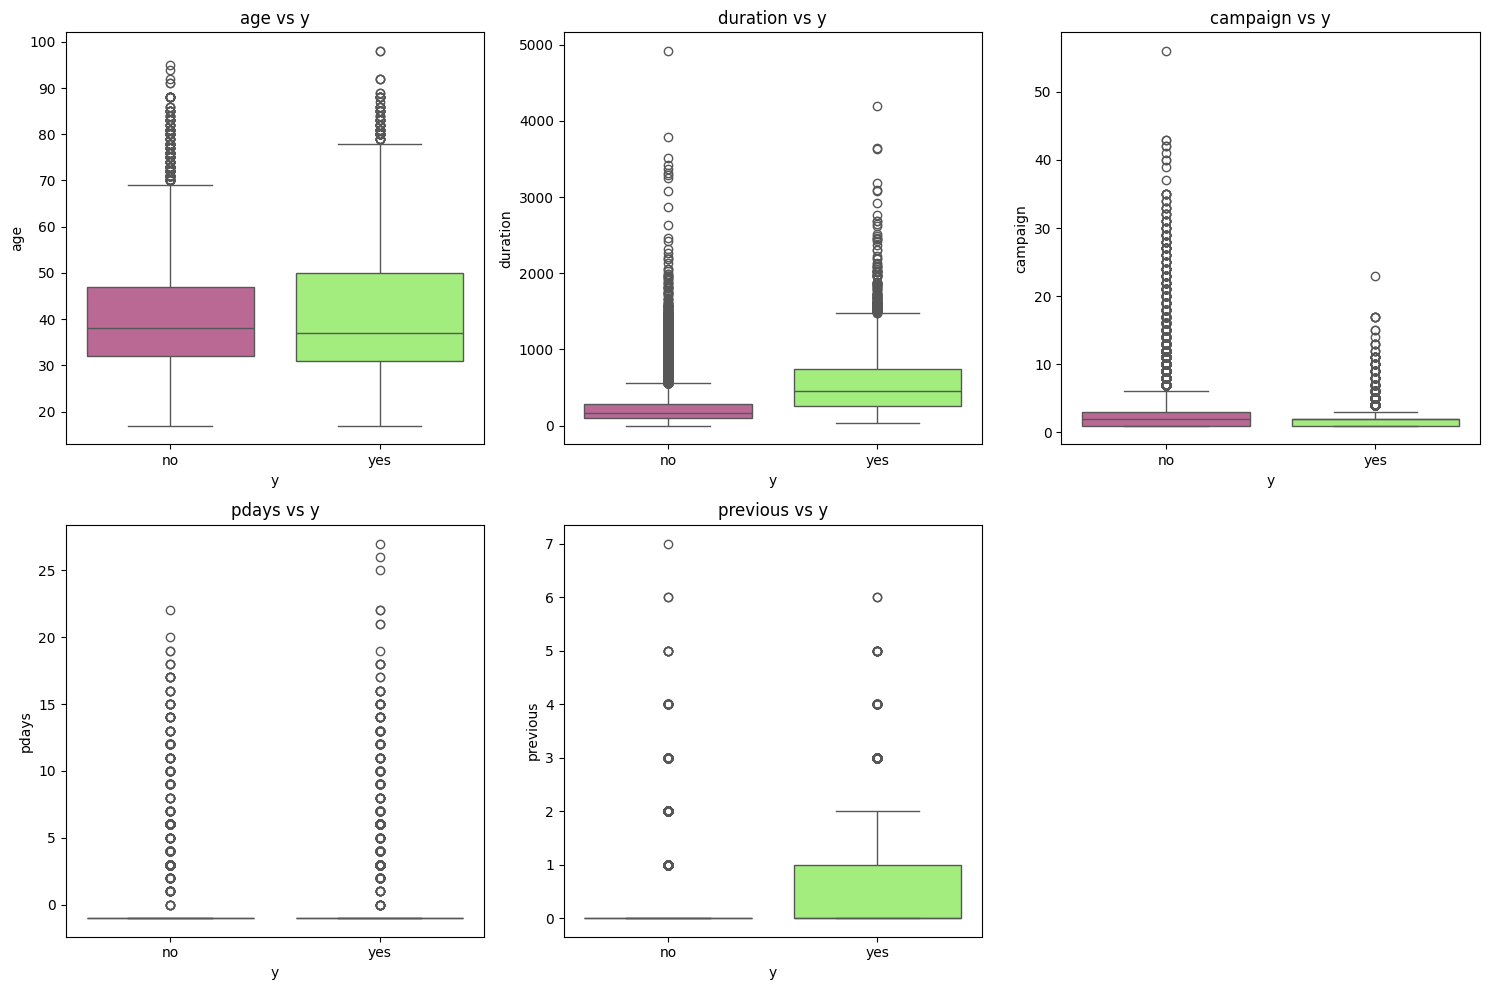

In [60]:
palette_map = {'no': "#C85A958B", 'yes': "#9CFF6B"}
econ_cols = ['age','duration', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(econ_cols):
    sns.boxplot(x='y', y=col, hue='y', data=df,
                ax=axes[i], palette=palette_map, dodge=False, legend=False)
    axes[i].set_title(f'{col} vs y')
    axes[i].set_xlabel('y'); axes[i].set_ylabel(col)

# hide the unused last subplot (since 2x3=6 but we have 5 plots)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


#### Based on the distribution plots and boxplots the following observations are made and furter steps are taken

#### Handling `age`, `duration` and `campaign`

 `duration` Duration represents the length of the current call, but this information is only available after the call ends and the outcome (y) is already determined. Including duration in the model will create artificially inflated performance metrics that will be highly accurate during training but fail completely when tested.

Age outliers: 467


C:\Users\HP\AppData\Local\Temp\ipykernel_20940\615799574.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['age_group'],


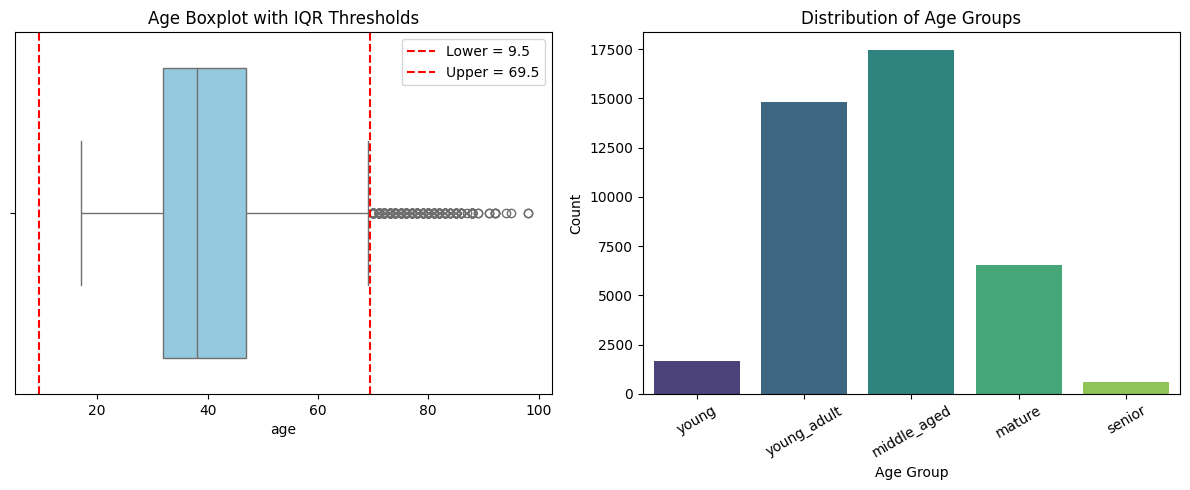

In [61]:
# Compute IQR thresholds
age_q1 = df['age'].quantile(0.25)
age_q3 = df['age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_lower = age_q1 - 1.5 * age_iqr
age_upper = age_q3 + 1.5 * age_iqr

print(f'Age outliers: {((df["age"] < age_lower) | (df["age"] > age_upper)).sum()}')

# Define age bins
bins = [0, 25, 35, 50, 65, 100]
labels = ['young', 'young_adult', 'middle_aged', 'mature', 'senior']

# Assign age groups (include right edge so 100 falls into 'senior')
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1) Boxplot of age with IQR lines + outliers visible
sns.boxplot(x=df['age'], ax=axes[0], color='skyblue', showfliers=True)
axes[0].axvline(age_lower, color='red', linestyle='--', label=f'Lower = {age_lower:.1f}')
axes[0].axvline(age_upper, color='red', linestyle='--', label=f'Upper = {age_upper:.1f}')
axes[0].set_title('Age Boxplot with IQR Thresholds')
axes[0].legend()

# 2) Countplot of age groups
sns.countplot(x=df['age_group'], 
              order=['young', 'young_adult', 'middle_aged', 'mature', 'senior'],
              palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
plt.setp(axes[1].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


#### Although there are 467 individuals over the `age` of 69, removing them is not a good idea, as the horizontal `job` vs `target` plot shows they have the highest success rates.

#### Visualizing age group with target variable

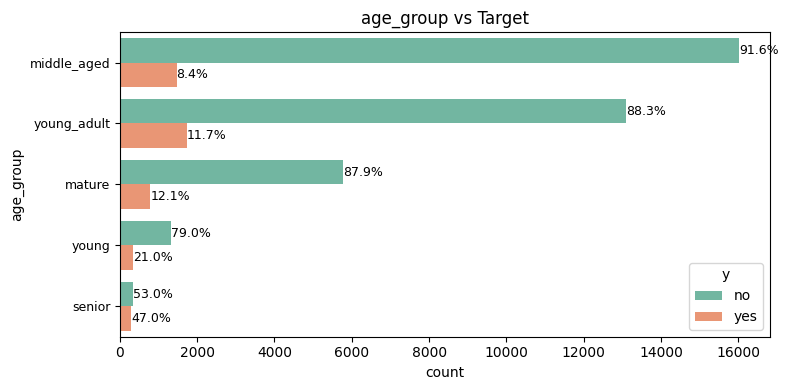

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

col = "age_group"   # your column of interest
max_categories = 12

data = df.copy()

# Limit to top categories
top_categories = data[col].value_counts().nlargest(max_categories).index

plt.figure(figsize=(8, 4))
ax = sns.countplot(
    y=col, hue="y", data=data,
    order=top_categories,
    palette="Set2"
)

# Add title and adjust ticks
ax.set_title(f"{col} vs Target", fontsize=12)
ax.tick_params(axis="y", labelsize=9)

# Calculate totals per category
totals = data[col].value_counts()

# Add percentages to bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        # Map bar position back to the category label
        category_index = int(round(p.get_y() + p.get_height() / 2))
        if category_index < len(ax.get_yticklabels()):
            category_name = ax.get_yticklabels()[category_index].get_text()
            total = totals[category_name]
            percentage = 100 * width / total
            ax.text(width, p.get_y() + p.get_height()/2,
                    f"{percentage:.1f}%",
                    ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.show()


#### The `campaign` variable is highly right-skewed, so we turning this messy numerical variable into clear, interpretable categories to visualize it properly and gain insights.

C:\Users\HP\AppData\Local\Temp\ipykernel_20940\1250255971.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


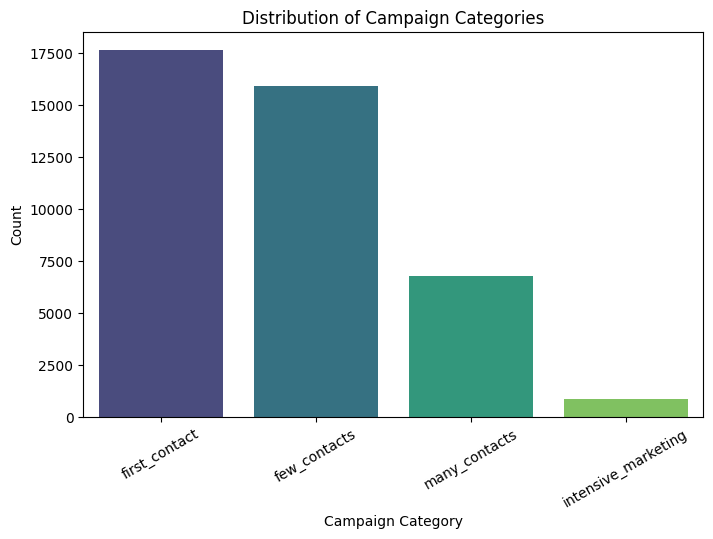

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorization
def categorize_campaign(camp):
    if camp == 1:
        return 'first_contact'
    elif camp <= 3:
        return 'few_contacts'
    elif camp <= 10:
        return 'many_contacts'
    else:
        return 'intensive_marketing'

df['campaign_category'] = df['campaign'].apply(categorize_campaign)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(
    x='campaign_category',
    data=df,
    order=['first_contact', 'few_contacts', 'many_contacts', 'intensive_marketing'],
    palette='viridis'
)
plt.title('Distribution of Campaign Categories')
plt.xlabel('Campaign Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


#### So, most people were contacted once or a few times, while very few were contacted more than 10 times."

#### Handling `pdays` and `previous`

In [64]:
# Create binary flag for previous contact
df['was_previously_contacted'] = (df['pdays'] != 1).astype(int)
# Create categorical version
def categorize_pdays(pdays):
    if  pdays == -1:
        return  'never_contacted'
    elif    pdays <=7:
        return  'recently_contacted'
    else:
        return  'contacted_long_ago'
df['pdays_category'] = df['pdays'].apply(categorize_pdays)

C:\Users\HP\AppData\Local\Temp\ipykernel_20940\2447703294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


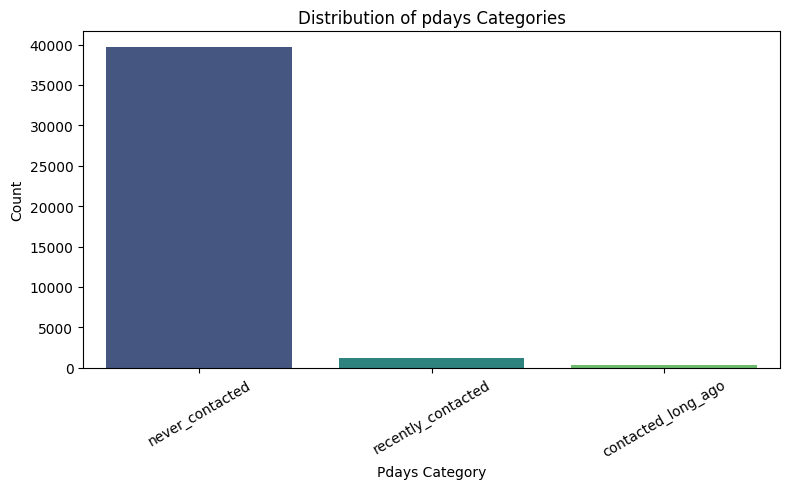

In [65]:
fig, axes = plt.subplots(figsize=(8, 5))

# Countplot for categorical pdays
sns.countplot(
    x='pdays_category', 
    data=df, 
    order=['never_contacted', 'recently_contacted', 'contacted_long_ago'],
    palette='viridis', 
    ax=axes
)
axes.set_title('Distribution of pdays Categories')
axes.set_xlabel('Pdays Category')
axes.set_ylabel('Count')
plt.setp(axes.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


#### Using categorization as it handles extreme skewness better than transformations, preserves the special meaning of -1 (never contacted), and captures both the contact/no-contact signal and timing information.

C:\Users\HP\AppData\Local\Temp\ipykernel_20940\2277001552.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


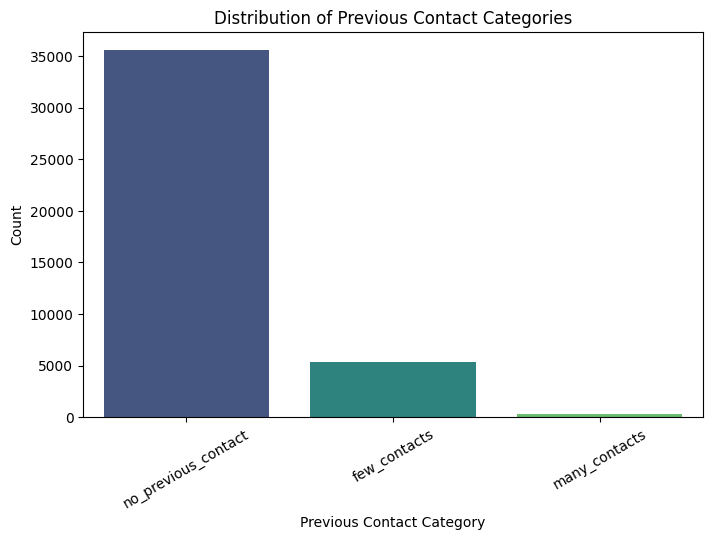

In [66]:
# Categorize previous contacts
def categorize_previous(prev):
    if prev == 0:
        return 'no_previous_contact'
    elif prev <= 2:
        return 'few_contacts'
    else:
        return 'many_contacts'

df['previous_category'] = df['previous'].apply(categorize_previous)

# Plot the categorical distribution
plt.figure(figsize=(8, 5))
sns.countplot(
    x='previous_category',
    data=df,
    order=['no_previous_contact', 'few_contacts', 'many_contacts'],
    palette='viridis'
)
plt.title('Distribution of Previous Contact Categories')
plt.xlabel('Previous Contact Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

#### Most of the customers the company is targeting are new, as there was no previous contact with the majority of clients

#### Now handling the economic indicator features `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, and `nr.employed`

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

#Categorization functions
def categorize_emp_var_rate(rate):
    if rate <= -2.0:
        return 'recession'
    elif rate <= -1.0:
        return 'decline'
    elif rate <= 0.0:
        return 'stable'
    else:
        return 'growth'

def categorize_price_idx(idx):
    if idx <= 93.0:
        return 'low_inflation'
    elif idx <= 93.7:
        return 'moderate_inflation'
    else:
        return 'high_inflation'

def categorize_confidence(conf):
    if conf <= -45:
        return 'very_pessimistic'
    elif conf <= -37:
        return 'pessimistic'
    elif conf <= -32:
        return 'neutral'
    else:
        return 'optimistic'

def categorize_euribor(rate):
    if rate <= 1.5:
        return 'ultra_low'
    elif rate <= 3.0:
        return 'low'
    elif rate <= 4.0:
        return 'normal'
    else:
        return 'high'

def categorize_employment(employed):
    if employed <= 5050:
        return 'low_employment'
    elif employed <= 5150:
        return 'moderate_employment'
    else:
        return 'high_employment'


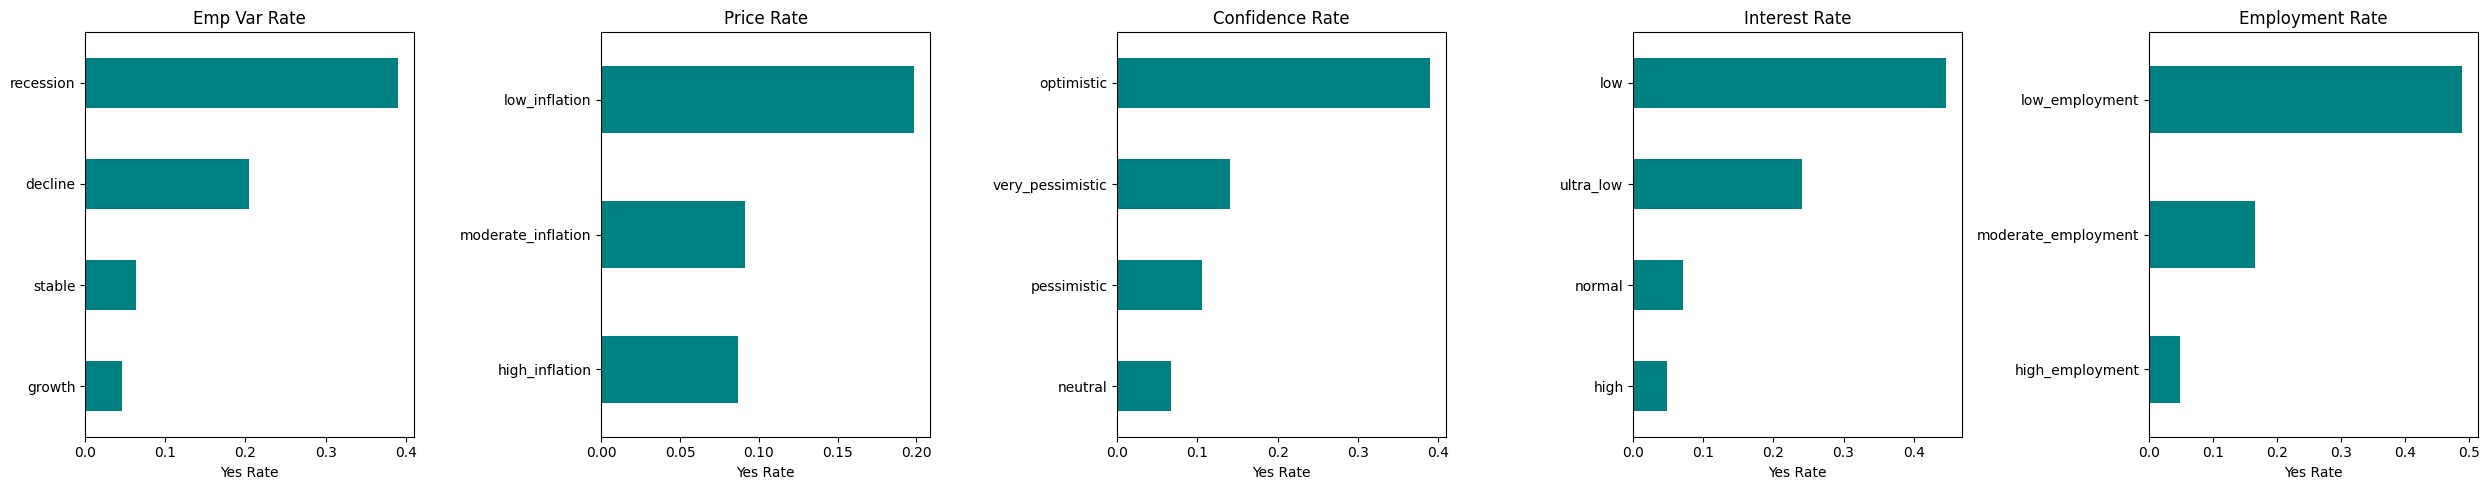

In [68]:

#Apply categorization functions to DataFrame
df['emp_var_rate']      = df['emp.var.rate'].apply(categorize_emp_var_rate)
df['price_rate']        = df['cons.price.idx'].apply(categorize_price_idx)
df['confidence_rate']   = df['cons.conf.idx'].apply(categorize_confidence)
df['interest_rate']     = df['euribor3m'].apply(categorize_euribor)
df['employment_rate']   = df['nr.employed'].apply(categorize_employment)


#Plot subscription rates side by side
econ_cats = [
    'emp_var_rate',
    'price_rate',
    'confidence_rate',
    'interest_rate',
    'employment_rate'
]

# 1 row, 5 columns
fig, axes = plt.subplots(1, len(econ_cats), figsize=(25, 5))

for ax, cat in zip(axes, econ_cats):
    # Compute subscription (yes) rates
    rates = pd.crosstab(df[cat], df['y'], normalize='index')['yes'].sort_values()
    
    # Horizontal bar plot
    rates.plot.barh(ax=ax, color='teal')
    ax.set_title(f'{cat.replace("_", " ").title()}', fontsize=12)
    ax.set_xlabel('Yes Rate')
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


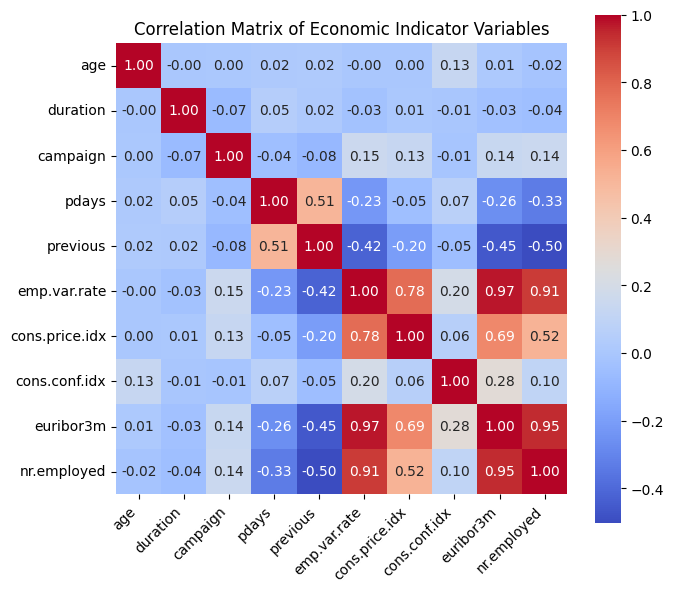

In [69]:
correlation_matrix = df.select_dtypes(include=['int64','float64']).corr()
# Set up the matplotlib figure
plt.figure(figsize=(7, 7))
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# Set title and labels
plt.title('Correlation Matrix of Economic Indicator Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
categorical_columns = []

for col in df.select_dtypes(include=['object']):
    if col !='y':
        categorical_columns.append(col)


In [71]:
from scipy.stats import chi2_contingency

cat_bina_columns = categorical_columns

def cramers_v(chi2, n, r, c):
    return np.sqrt(chi2 / (n * (min(r-1, c-1))))

chi_results = []
for col in cat_bina_columns:
    contingency_table = pd.crosstab(df[col], df['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, c = contingency_table.shape
    v = cramers_v(chi2, n, r, c)
    chi_results.append([col, chi2.round(3), p.round(3), v.round(3)])

chi_df = pd.DataFrame(chi_results, 
                      columns=['column','chi2_value','p_value','cramers_v']) \
                      .sort_values(by='chi2_value', ascending=False)

chi_df_mod = chi_df[['column','chi2_value']]

C:\Users\HP\AppData\Local\Temp\ipykernel_20940\21860395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi_df['column'], y=chi_df['cramers_v'], palette='coolwarm')


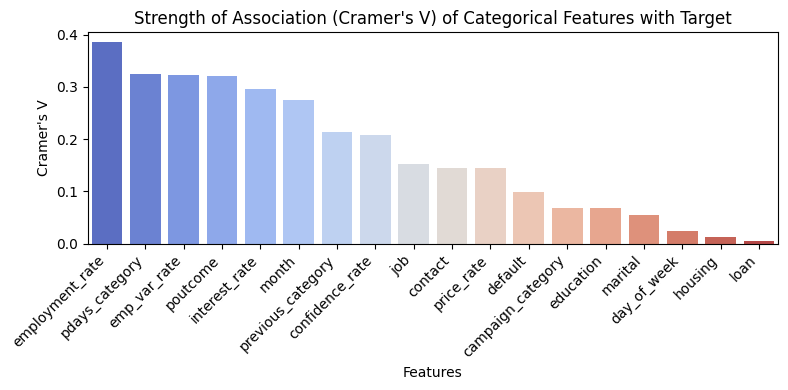

In [72]:
plt.figure(figsize=(8,4))
sns.barplot(x=chi_df['column'], y=chi_df['cramers_v'], palette='coolwarm')
plt.title('Strength of Association (Cramer\'s V) of Categorical Features with Target')
plt.xlabel('Features')
plt.ylabel('Cramer\'s V')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [73]:
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd

X_num = df[numerical_cols]
y = df['y']  # binary target ('yes'/'no' or 0/1)

results_mw = []

for col in numerical_cols:
    # Get groups
    group_labels = np.unique(y)
    if len(group_labels) != 2:
        print(f"Skipping {col}: target is not binary")
        results_mw.append([col, np.nan, np.nan, np.nan])
        continue

    g1 = X_num.loc[y == group_labels[0], col].dropna()
    g2 = X_num.loc[y == group_labels[1], col].dropna()

    if len(g1) > 0 and len(g2) > 0:
        try:
            # Mann–Whitney U test (two-sided)
            stat, p_value = mannwhitneyu(g1, g2, alternative="two-sided")

            # Effect size (r = Z / sqrt(N))
            # Approximate Z from U
            n1, n2 = len(g1), len(g2)
            mean_U = n1 * n2 / 2
            std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
            z = (stat - mean_U) / std_U
            r = abs(z) / np.sqrt(n1 + n2)

            results_mw.append([col, stat.round(3), p_value.round(3), r.round(3)])
        except Exception as e:
            print(f"Error processing {col}: {e}")
            results_mw.append([col, np.nan, np.nan, np.nan])
    else:
        results_mw.append([col, np.nan, np.nan, np.nan])

# Create results DataFrame
results_mw_df = pd.DataFrame(
    results_mw,
    columns=['column', 'U_statistic', 'p_value', 'effect_size_r']
).sort_values(by='p_value', ascending=True)



C:\Users\HP\AppData\Local\Temp\ipykernel_20940\1262630972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


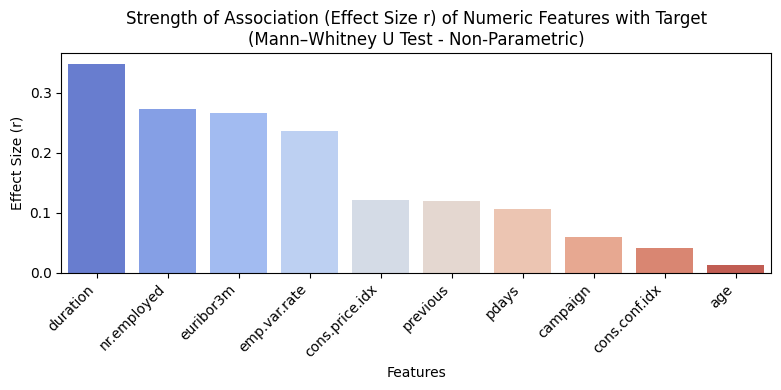

In [74]:
# Sort by effect size (descending)
sorted_df = results_mw_df.sort_values(by='effect_size_r', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    x='column',
    y='effect_size_r',
    data=sorted_df,
    palette='coolwarm'
)

plt.title('Strength of Association (Effect Size r) of Numeric Features with Target\n(Mann–Whitney U Test - Non-Parametric)')
plt.xlabel('Features')
plt.ylabel('Effect Size (r)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Removing the columns the are higly correlated `emp.var.rate` and `nr.employed` and storing the new dataframe to df_redued

In [75]:
# List of columns to remove
cols_to_drop = ['emp.var.rate', 'nr.employed']

# Create a new DataFrame without those columns
df_reduced = df.drop(columns=cols_to_drop)
